# 🔄 جریان‌های کاری پایه با مدل‌های GitHub (پایتون)

## 📋 آموزش هماهنگی جریان کاری

این دفترچه قابلیت‌های قدرتمند **سازنده جریان کاری** در چارچوب عامل مایکروسافت را معرفی می‌کند. یاد بگیرید چگونه جریان‌های کاری پیچیده و چندمرحله‌ای ایجاد کنید که بتوانند فرآیندهای پیچیده کسب‌وکار را مدیریت کرده و عملیات‌های مختلف هوش مصنوعی را به‌طور یکپارچه هماهنگ کنند.

## 🎯 اهداف یادگیری

### 🏗️ **معماری جریان کاری**
- **سازنده جریان کاری**: طراحی و هماهنگی فرآیندهای پیچیده چندمرحله‌ای
- **اجرای مبتنی بر رویداد**: مدیریت رویدادهای جریان کاری و انتقال حالت‌ها
- **طراحی بصری جریان کاری**: ایجاد و مشاهده ساختارهای جریان کاری
- **ادغام مدل‌های GitHub**: استفاده از مدل‌های هوش مصنوعی در زمینه‌های جریان کاری

### 🔄 **هماهنگی فرآیند**
- **عملیات‌های متوالی**: زنجیره‌ای کردن وظایف عامل‌ها به ترتیب منطقی
- **منطق شرطی**: پیاده‌سازی نقاط تصمیم‌گیری و جریان‌های کاری شاخه‌ای
- **مدیریت خطا**: بازیابی خطا و مقاومت جریان کاری
- **مدیریت حالت**: ردیابی و مدیریت حالت اجرای جریان کاری

### 📊 **الگوهای جریان کاری سازمانی**
- **اتوماسیون فرآیند کسب‌وکار**: خودکارسازی جریان‌های کاری پیچیده سازمانی
- **هماهنگی چندعامل**: هماهنگی میان عامل‌های تخصصی مختلف
- **اجرای مقیاس‌پذیر**: طراحی جریان‌های کاری برای عملیات در مقیاس سازمانی
- **نظارت و مشاهده‌پذیری**: ردیابی عملکرد و نتایج جریان کاری

## ⚙️ پیش‌نیازها و تنظیمات

### 📦 **وابستگی‌های مورد نیاز**

چارچوب عامل را با قابلیت‌های جریان کاری نصب کنید:

```bash
pip install agent-framework-core -U
```

### 🔑 **پیکربندی مدل‌های GitHub**

**تنظیمات محیطی (.env file):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

### 🏢 **موارد استفاده سازمانی**

**نمونه‌های فرآیند کسب‌وکار:**
- **پذیرش مشتری**: جریان‌های کاری چندمرحله‌ای برای تأیید و تنظیم
- **خط تولید محتوا**: ایجاد، بررسی و انتشار خودکار محتوا
- **پردازش داده‌ها**: جریان‌های ETL با تبدیل‌های مبتنی بر هوش مصنوعی
- **تضمین کیفیت**: آزمایش و اعتبارسنجی خودکار فرآیندها

**مزایای جریان کاری:**
- 🎯 **قابلیت اطمینان**: اجرای قطعی با بازیابی خطا
- 📈 **مقیاس‌پذیری**: مدیریت خودکار فرآیندهای با حجم بالا
- 🔍 **مشاهده‌پذیری**: ردپای کامل و نظارت
- 🔧 **قابلیت نگهداری**: طراحی بصری و اجزای ماژولار

## 🎨 الگوهای طراحی جریان کاری

### ساختار پایه جریان کاری
```mermaid
graph TD
    A[Start] --> B[Agent Task 1]
    B --> C{Decision Point}
    C -->|Success| D[Agent Task 2]
    C -->|Failure| E[Error Handler]
    D --> F[End]
    E --> F
```

**اجزای کلیدی:**
- **WorkflowBuilder**: موتور اصلی هماهنگی
- **WorkflowEvent**: مدیریت رویدادها و ارتباطات
- **WorkflowViz**: نمایش بصری جریان کاری و اشکال‌زدایی

بیایید اولین جریان کاری هوشمند خود را بسازیم! 🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
# 🔄 Import Workflow and Agent Framework Components
# Core components for building sophisticated agent workflows

from agent_framework.openai import OpenAIChatClient    # 🤖 GitHub Models client integration
from agent_framework import WorkflowBuilder, WorkflowEvent, WorkflowViz  # 🏗️ Workflow orchestration tools

In [3]:
# 📦 Import Environment and System Utilities
# Essential libraries for configuration and environment management

import os                      # 🔧 Environment variable access
from dotenv import load_dotenv # 📁 Secure configuration loading

In [4]:
# 🔧 Initialize Environment Configuration
# Load GitHub Models API credentials from .env file
load_dotenv()

True

In [5]:
# 🔗 Initialize GitHub Models Chat Client for Workflow Operations
# Create the AI client that will power agents within our workflow
chat_client = OpenAIChatClient(
    base_url=os.environ.get("GITHUB_ENDPOINT"),    # 🌐 GitHub Models API endpoint
    api_key=os.environ.get("GITHUB_TOKEN"),        # 🔑 Authentication token
    model_id=os.environ.get("GITHUB_MODEL_ID")  # 🎯 Selected AI model
)

In [6]:
REVIEWER_NAME = "Concierge"
REVIEWER_INSTRUCTIONS = """
    You are an are hotel concierge who has opinions about providing the most local and authentic experiences for travelers.
    The goal is to determine if the front desk travel agent has recommended the best non-touristy experience for a traveler.
    If so, state that it is approved.
    If not, provide insight on how to refine the recommendation without using a specific example. 
    """

In [7]:
FRONTDESK_NAME = "FrontDesk"
FRONTDESK_INSTRUCTIONS = """
    You are a Front Desk Travel Agent with ten years of experience and are known for brevity as you deal with many customers.
    The goal is to provide the best activities and locations for a traveler to visit.
    Only provide a single recommendation per response.
    You're laser focused on the goal at hand.
    Don't waste time with chit chat.
    Consider suggestions when refining an idea.
    """

In [8]:
reviewer_agent   = chat_client.create_agent(
        instructions=(
           REVIEWER_INSTRUCTIONS
        ),
        name=REVIEWER_NAME,
    )

front_desk_agent = chat_client.create_agent(
        instructions=(
            FRONTDESK_INSTRUCTIONS
        ),
        name=FRONTDESK_NAME,
    )

In [9]:
workflow = WorkflowBuilder().set_start_executor(front_desk_agent).add_edge(front_desk_agent, reviewer_agent).build()

In [10]:

print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  FrontDesk["FrontDesk (Start)"];
  Concierge["Concierge"];
  FrontDesk --> Concierge;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "FrontDesk" [fillcolor=lightgreen, label="FrontDesk\n(Start)"];
  "Concierge" [label="Concierge"];
  "FrontDesk" -> "Concierge";
}
SVG file saved to: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


In [11]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


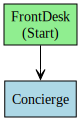

In [12]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")


In [13]:
result =''
async for event in workflow.run_stream('I would like to go to Paris.'):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)
        # print(f"Workflow output: {event.data}")

In [14]:
result.replace("None", "")

'Visit the Louvre Museum for world-class art and historical masterpieces.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal interactions and deeper connections with the local community.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal inte


---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، توصیه می‌شود از ترجمه انسانی حرفه‌ای استفاده کنید. ما مسئولیتی در قبال سوء تفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
